In [1]:
pip install dask pandas matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   vendor_id      pickup_datetime     dropoff_datetime  passenger_count  \
0          2  2018-03-29 13:37:13  2018-03-29 14:17:01              1.0   
1          2  2018-03-29 13:37:18  2018-03-29 14:15:33              1.0   
2          2  2018-03-29 13:26:57  2018-03-29 13:28:03              1.0   
3          2  2018-03-29 13:07:48  2018-03-29 14:03:05              2.0   
4          2  2018-03-29 14:19:11  2018-03-29 15:19:59              5.0   

   trip_distance  rate_code store_and_fwd_flag  payment_type  fare_amount  \
0          18.15          3                  N             1         70.0   
1           4.59          1                  N             1         25.0   
2           0.30          1                  N             1          3.0   
3          16.97          1                  N             1         49.5   
4          14.45          1                  N             1         45.5   

   extra  mta_tax  tip_amount  tolls_amount  imp_surcharge  total_amount  \
0    0.0  

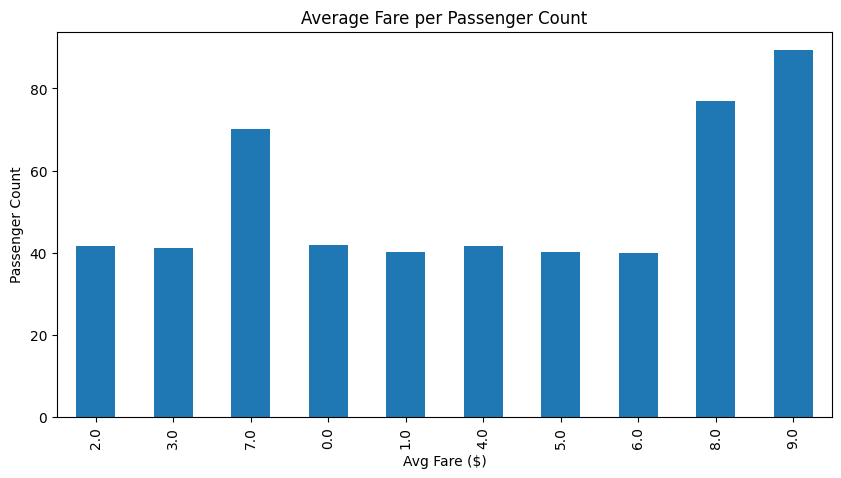

In [6]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Load large dataset (Modify path if needed)
df = dd.read_csv(r"C:\Users\Deathportuer\Desktop\Desktop\Largedatasets\taxi_trip_data.csv", dtype={'VendorID': 'float64', 'passenger_count': 'float64'})

# Display initial rows
print(df.head())

# Basic Statistics
print(df.describe().compute())

# Aggregation: Average Fare per Passenger
df['total_amount'] = df['total_amount'].astype('float64')
result = df.groupby('passenger_count')['total_amount'].mean().compute()
print(result)

# Visualization
result.plot(kind='bar', figsize=(10,5))
plt.ylabel("Passenger Count")
plt.xlabel("Avg Fare ($)")
plt.title("Average Fare per Passenger Count")
plt.show()
